# Step 1: Data Preparation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r"E:\Unified Mentor\Olympics Data Analysis\Summer-Olympic-medals-1976-to-2008.csv", encoding='latin1')
print("First 10 rows of the DataFrame:")
df.head(10)

First 10 rows of the DataFrame:


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
5,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold
9,Montreal,1976.0,Aquatics,Diving,10m platform,"ALEINIK, Vladimir",Men,URS,Soviet Union,M,Bronze


In [6]:
# Clean the dataset
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

Missing values after cleaning:
City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


In [8]:
# Total number of medals based on sex

sum_of_medals = df.groupby('Event_gender')['Medal'].value_counts().unstack(fill_value=0)

# Convert into a DataFrame
Total_medals = sum_of_medals.reset_index()

print('Total number of Medals based on Sex:')
print(Total_medals)

Total number of Medals based on Sex:
Medal Event_gender  Bronze  Gold  Silver
0                M    3068  2878    2871
1                W    1950  1919    1904
2                X     240   245     241


# Step 2: Exploratory Data Analysis (EDA)

In [10]:
# Summary statistics
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316.000000,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,NaN,28,41,293,11337,2,128,127,3,3
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,817,16,9388,1992,1992,8817,5258
mean,NaN,1993.620789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


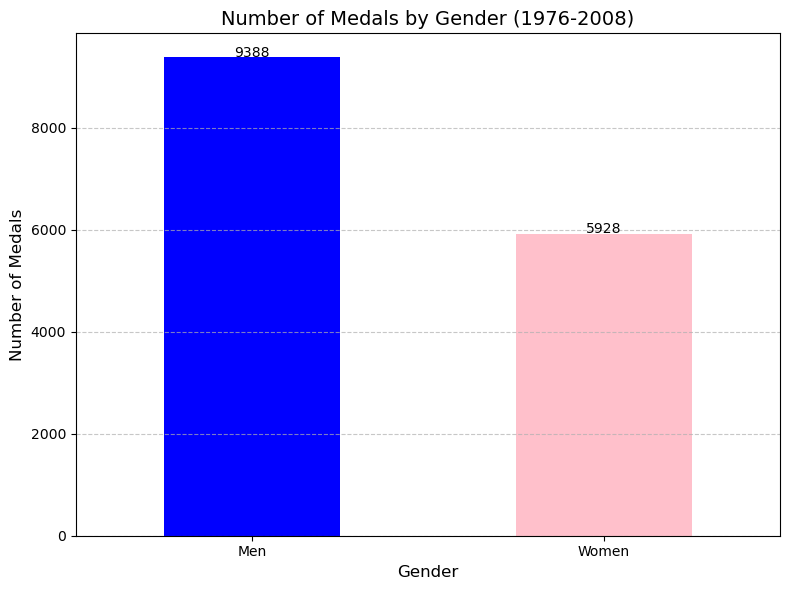

In [42]:
# Total count medals by Gender
data = df.dropna(subset=['Gender'])

# Count medals by Event_gender
medal_counts = data['Gender'].value_counts().sort_index()


# Create the bar plot
plt.figure(figsize=(8, 6))
ax = medal_counts.plot(kind='bar', color=['blue', 'pink'])

# Customize the plot
plt.title('Number of Medals by Gender (1976-2008)', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,             
            int(p.get_height()),            
            ha='center')
    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

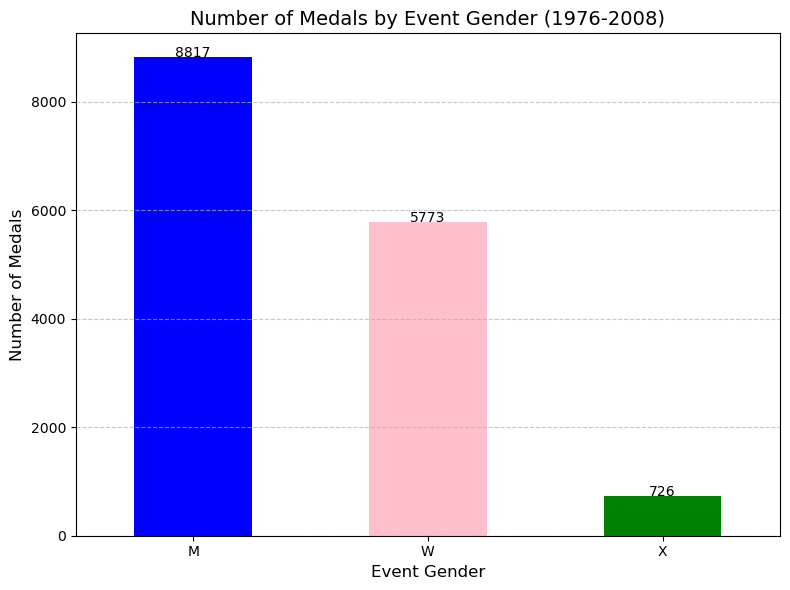

In [44]:
# Total count medals by Event Gender
data = df.dropna(subset=['Event_gender'])

# Count medals by Event_gender
medal_counts = data['Event_gender'].value_counts().sort_index()


# Create the bar plot
plt.figure(figsize=(8, 6))
ax = medal_counts.plot(kind='bar', color=['blue', 'pink', 'green'])

# Customize the plot
plt.title('Number of Medals by Event Gender (1976-2008)', fontsize=14)
plt.xlabel('Event Gender', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,             
            int(p.get_height()),            
            ha='center')
    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

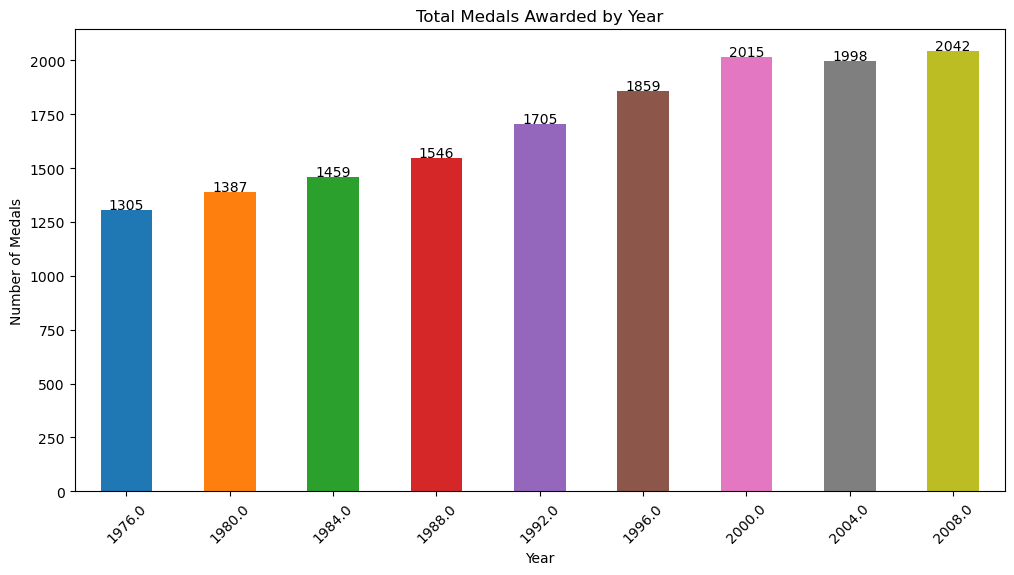

In [22]:
# Plot trends of medals across years

plt.figure(figsize=(12, 6))

# Group medals by year
medals_by_year = df.groupby('Year')['Medal'].count()
colors = sns.color_palette("tab10", n_colors=len(medals_by_year))  # You can change "tab10" to other palettes
ax = medals_by_year.plot(kind='bar', color=colors)

plt.title('Total Medals Awarded by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,             
            int(p.get_height()),            
            ha='center')
    
plt.xticks(rotation=45)

plt.show()

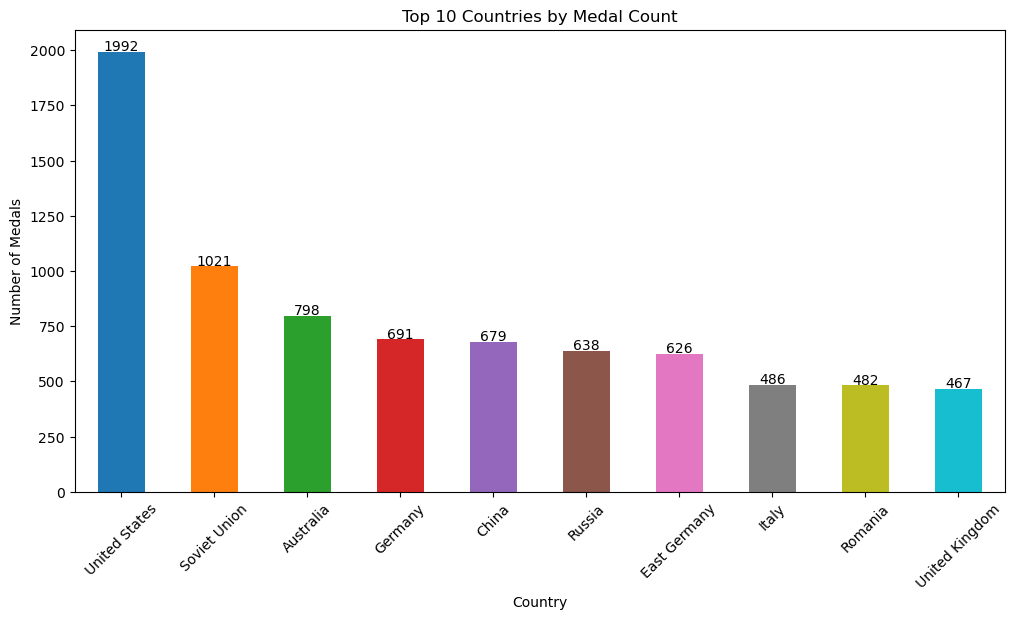

In [24]:
# Top-performing countries
plt.figure(figsize=(12, 6))

# Get top 10 countries by medal count
top_countries = df['Country'].value_counts().head(10)
colors = sns.color_palette("tab10", n_colors=len(top_countries))  # Change "tab10" to other palettes if needed

# Create bar plot
ax = top_countries.plot(kind='bar', color=colors)

# Add labels on top of bars
for i, value in enumerate(top_countries.values): ax.text(i, value + 5, str(value), ha='center') 
    
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)

plt.show()

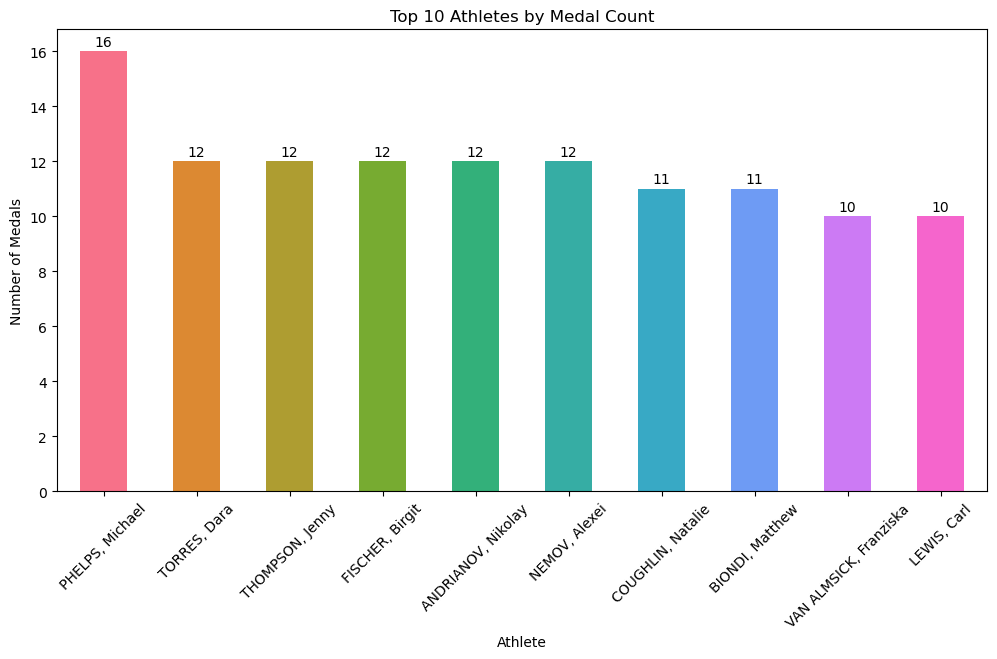

In [26]:
# Top-performing athletes
plt.figure(figsize=(12, 6))

# Get top 10 athletes by medal count
top_athletes = df['Athlete'].value_counts().head(10)
colors = sns.color_palette("husl", n_colors=len(top_athletes))
ax = top_athletes.plot(kind='bar', color=colors)

# Add labels on top of bars
for i, value in enumerate(top_athletes.values): ax.text(i, value + 0.2, str(value), ha='center')
            
plt.title('Top 10 Athletes by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)

plt.show()

# Step 3: Visualizing Key Insights

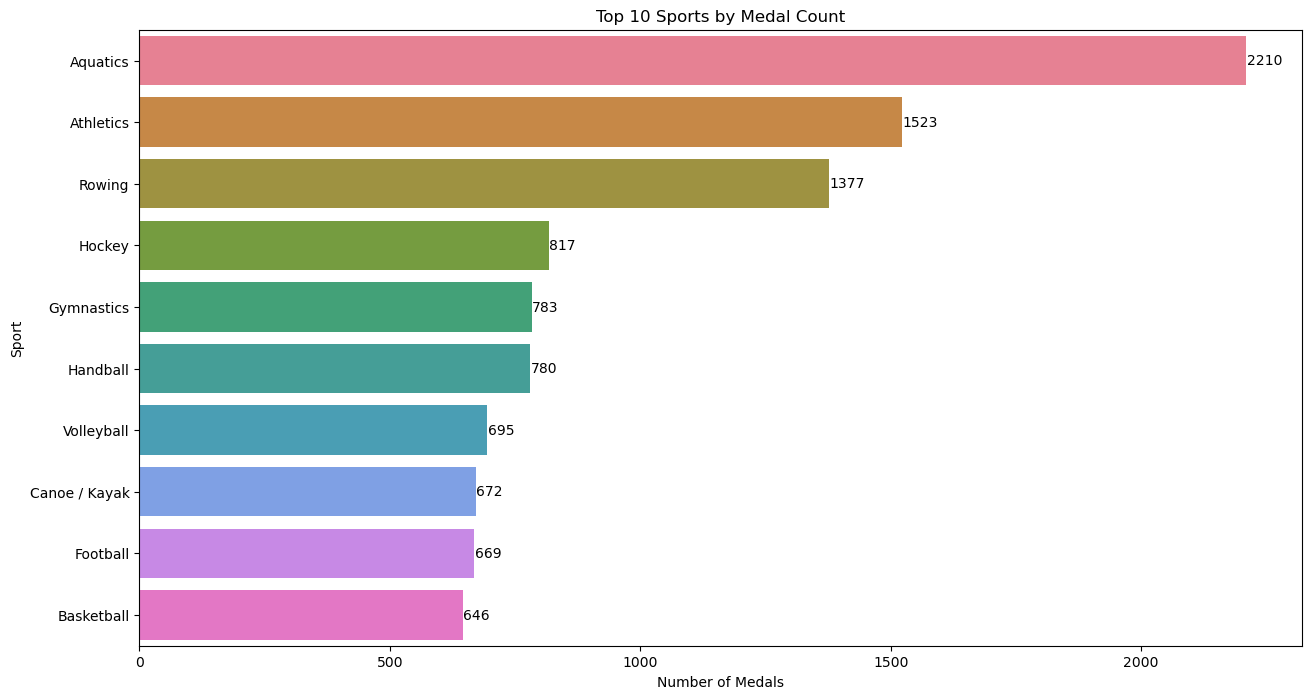

In [34]:
# Distribution of medals by sport

top_sports = df['Sport'].value_counts().head(10)

plt.figure(figsize=(15, 8))
ax = sns.countplot(y='Sport', data=df, order=df['Sport'].value_counts().index[:10], palette=sns.color_palette("husl", n_colors=len(top_sports)))

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_width() + 1, 
            p.get_y() + p.get_height() / 2,
            int(p.get_width()), ha='left', va='center')
    
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.show()

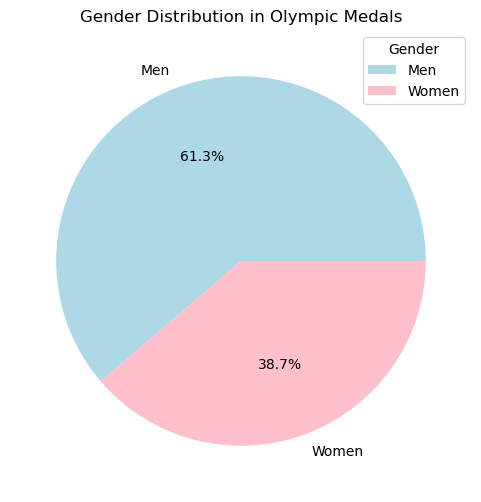

In [56]:
# Gender distribution
gender_dist = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_dist.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution in Olympic Medals')
plt.legend(title ='Gender')
plt.ylabel('')
plt.show()

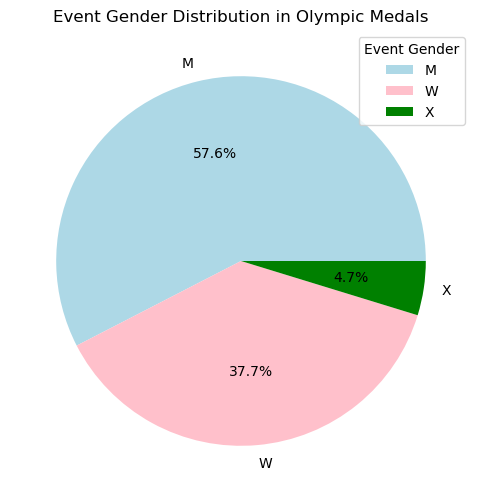

In [52]:
# Event Gender distribution
gender_dist = df['Event_gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_dist.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'green'])
plt.title('Event Gender Distribution in Olympic Medals')
plt.legend(title ='Event Gender')
plt.ylabel('')
plt.show()

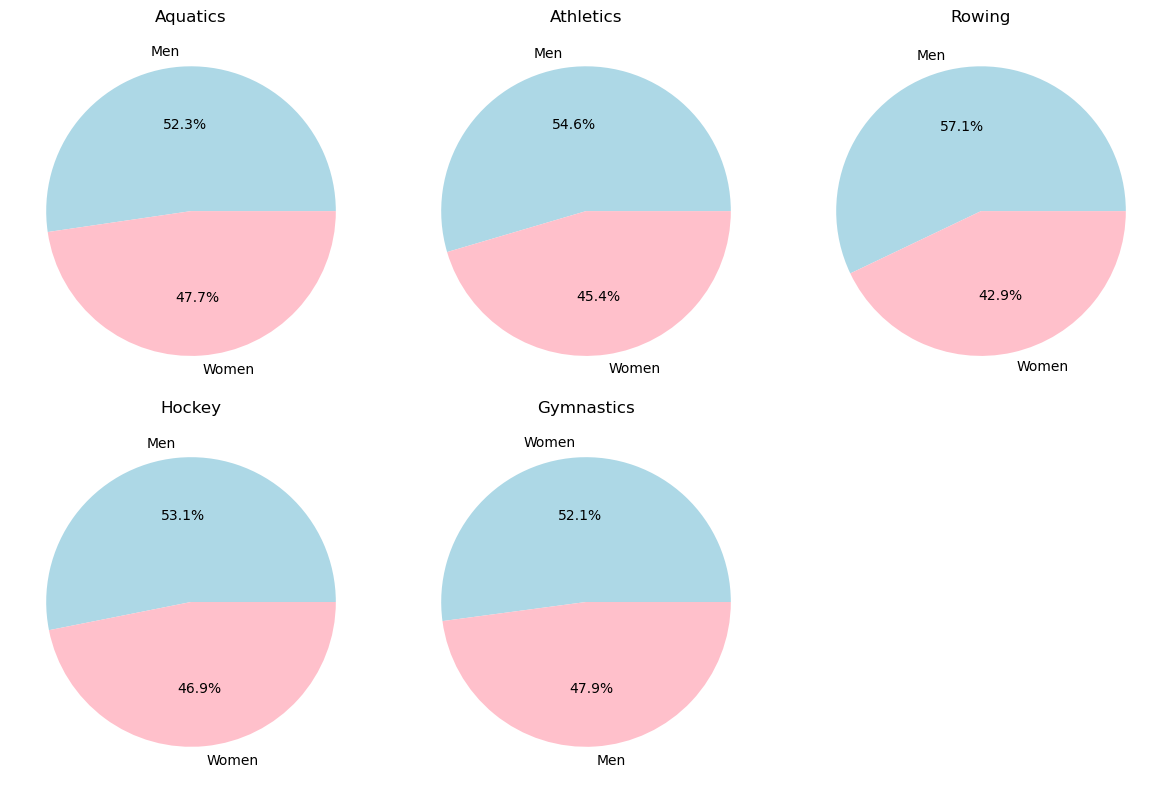

In [60]:
# Gender distribution by sport
top_sports = df['Sport'].value_counts().index[:5]
plt.figure(figsize=(12, 8))
for i, sport in enumerate(top_sports):
    plt.subplot(2, 3, i+1)
    df[df['Sport'] == sport]['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
    plt.title(sport)
    plt.ylabel('')
plt.tight_layout()
plt.show()